###  `sklearn.preprocessing.KBinsDiscretizer` Discretizes continuous data to bins

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

### Importing modules

In [1]:
from sklearn.preprocessing import KBinsDiscretizer

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('datasets/auto-mpg.csv', na_values='?')

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
104,12.0,8,400.0,167.0,4906,12.5,73,1,ford country
155,15.0,6,250.0,72.0,3158,19.5,75,1,ford maverick
236,25.5,4,140.0,89.0,2755,15.8,77,1,ford mustang ii 2+2
335,35.0,4,122.0,88.0,2500,15.1,80,2,triumph tr7 coupe
334,23.7,3,70.0,100.0,2420,12.5,80,3,mazda rx-7 gs
232,16.0,8,351.0,149.0,4335,14.5,77,1,ford thunderbird
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
51,30.0,4,79.0,70.0,2074,19.5,71,2,peugeot 304
207,20.0,4,130.0,102.0,3150,15.7,76,2,volvo 245
180,25.0,4,121.0,115.0,2671,13.5,75,2,saab 99le


In [3]:
car_data.drop(columns=['car name',
                       'origin', 
                       'model year'], 
              inplace=True)

car_data.dropna(inplace=True)

car_data.reset_index(inplace=True, drop=True)

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
4,17.0,8,302.0,140.0,3449,10.5
32,19.0,6,232.0,100.0,2634,13.0
333,32.4,4,107.0,72.0,2290,17.0
30,28.0,4,140.0,90.0,2264,15.5
53,35.0,4,72.0,69.0,1613,18.0
387,27.0,4,140.0,86.0,2790,15.6
22,25.0,4,104.0,95.0,2375,17.5
335,26.6,4,151.0,84.0,2635,16.4
46,19.0,6,250.0,100.0,3282,15.0
21,24.0,4,107.0,90.0,2430,14.5


### Plotting the dataset
Engine displacement is the size of the engine (usually expressed in cc, but is in cubic inches here). A bigger engine is one way to increase the power of the engine, but usually at the cost of fuel economy. The aim usually is to maximize horsepower and minimize engine displacement.

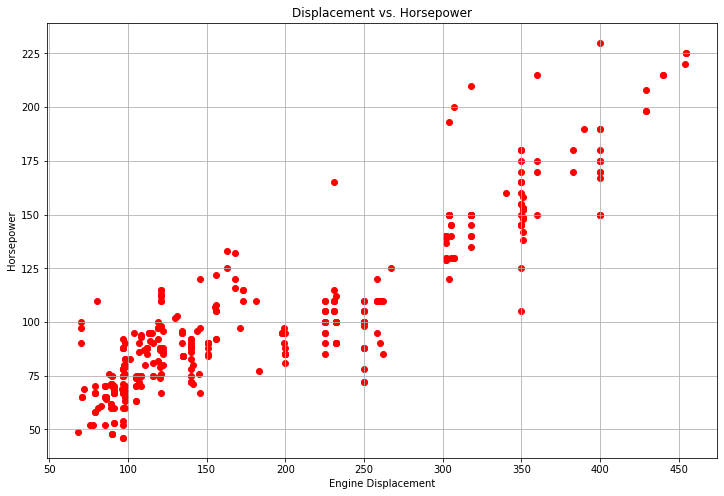

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(car_data['displacement'], 
            car_data['horsepower'], 
            color='red')

ax.set(xlabel='Engine Displacement', ylabel='Horsepower',
       title='Displacement vs. Horsepower')
ax.grid()

plt.show()

### Creating a KBinsDiscretizer object

In [5]:
k_bins = KBinsDiscretizer(n_bins=5, 
                          encode='ordinal', 
                          strategy='uniform')

k_bins

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform')

### Fitting the object for the dataset and printing the shape 

In [6]:
k_bins_array = k_bins.fit_transform(car_data[['displacement','horsepower']])

k_bins_array.shape

(392, 2)

### Printing the values interms of bin

In [7]:
kbins_df = pd.DataFrame(data = k_bins_array,
                        columns = ['bin_displacement', 'bin_horsepower'])
kbins_df.sample(10)

,bin_displacement,bin_horsepower
337,1.0,1.0
133,2.0,1.0
291,0.0,0.0
377,0.0,0.0
240,0.0,1.0
380,1.0,1.0
270,1.0,1.0
150,2.0,1.0
336,1.0,1.0
21,0.0,1.0


### Concatenating the binned dataframe with the dataset

In [8]:
car_data_k_bins = pd.concat([car_data, kbins_df], axis=1)

car_data_k_bins.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower
321,27.9,4,156.0,105.0,2800,14.4,1.0,1.0
30,28.0,4,140.0,90.0,2264,15.5,0.0,1.0
42,13.0,8,400.0,170.0,4746,12.0,4.0,3.0
144,28.0,4,90.0,75.0,2125,14.5,0.0,0.0
255,19.4,6,232.0,90.0,3210,17.2,2.0,1.0
158,17.0,6,231.0,110.0,3907,21.0,2.0,1.0
281,20.2,6,232.0,90.0,3265,18.2,2.0,1.0
237,30.0,4,97.0,67.0,1985,16.4,0.0,0.0
347,34.4,4,98.0,65.0,2045,16.2,0.0,0.0
198,18.0,6,250.0,78.0,3574,21.0,2.0,0.0


In [9]:
car_data_k_bins['bin_displacement'].unique()

array([3., 4., 0., 1., 2.])

In [10]:
car_data_k_bins['bin_horsepower'].unique()

array([2., 3., 4., 1., 0.])

In [11]:
displacement_edges = k_bins.bin_edges_[0]
horsepower_edges = k_bins.bin_edges_[1]

displacement_edges, horsepower_edges

(array([ 68. , 145.4, 222.8, 300.2, 377.6, 455. ]),
 array([ 46. ,  82.8, 119.6, 156.4, 193.2, 230. ]))

### Creating a empty column with the name `Comment`

In [12]:
car_data_k_bins['Comment'] = ''

car_data_k_bins.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower,Comment
0,18.0,8,307.0,130.0,3504,12.0,3.0,2.0,
1,15.0,8,350.0,165.0,3693,11.5,3.0,3.0,
2,18.0,8,318.0,150.0,3436,11.0,3.0,2.0,
3,16.0,8,304.0,150.0,3433,12.0,3.0,2.0,
4,17.0,8,302.0,140.0,3449,10.5,3.0,2.0,


#### Populate the comment field
If the bin for horsepower is greater than the bin for displacement, we mark the car as efficient. If the displacement bin is higher than that for horsepower, it's considered inefficient.

In [13]:
car_data_k_bins.loc[car_data_k_bins['bin_displacement'] < 
                    car_data_k_bins['bin_horsepower'] ,
                    'Comment'] = 'Efficient'

In [14]:
car_data_k_bins.loc[car_data_k_bins['bin_displacement'] >
                    car_data_k_bins['bin_horsepower'] ,
                    'Comment'] = 'Inefficient'

In [15]:
car_data_k_bins.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower,Comment
57,25.0,4,97.5,80.0,2126,17.0,0.0,0.0,
311,28.0,4,151.0,90.0,2678,16.5,1.0,1.0,
47,18.0,6,250.0,88.0,3139,14.5,2.0,1.0,Inefficient
155,15.0,8,350.0,145.0,4440,14.0,3.0,2.0,Inefficient
340,39.0,4,86.0,64.0,1875,16.4,0.0,0.0,
351,32.4,4,108.0,75.0,2350,16.8,0.0,0.0,
375,36.0,4,107.0,75.0,2205,14.5,0.0,0.0,
132,16.0,6,258.0,110.0,3632,18.0,2.0,1.0,Inefficient
149,31.0,4,79.0,67.0,2000,16.0,0.0,0.0,
326,30.0,4,146.0,67.0,3250,21.8,1.0,0.0,Inefficient


In [16]:
categories = car_data_k_bins['Comment'].unique()

categories

array(['Inefficient', '', 'Efficient'], dtype=object)

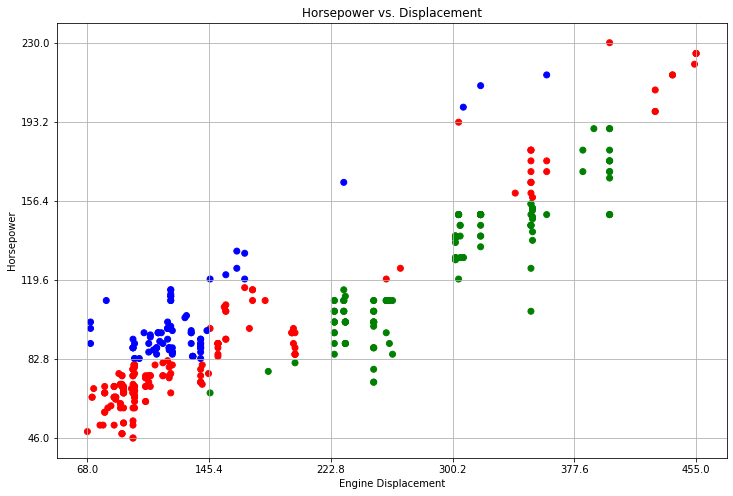

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {categories[0]:'green', 
          categories[1]:'red',
          categories[2]:'blue'}

ax.scatter(car_data_k_bins['displacement'], 
           car_data_k_bins['horsepower'], 
           c=car_data_k_bins['Comment'].apply(lambda x: colors[x]))

ax.set(xlabel='Engine Displacement', 
       ylabel='Horsepower',
       title='Horsepower vs. Displacement')

ax.grid()
ax.set_xticks(displacement_edges);
ax.set_yticks(horsepower_edges);

plt.show()